In his [2018 annual letter](https://www.gatesnotes.com/2018-Annual-Letter), Melinda and Bill Gates answer an interesting question:

> Tough Question #5 : Does saving kids’ lives lead to overpopulation?
>
> Melinda: We asked ourselves the same question at first. Hans Rosling, the brilliant and inspiring public health advocate who died last year, was great at answering it. I wrote about the issue at length in our 2014 letter. But it bears repeating, because it is so counterintuitive. When more children live past the age of 5, and when mothers can decide if and when to have children, population sizes don’t go up. They go down. Parents have fewer children when they’re confident those children will survive into adulthood. Big families are in some ways an insurance policy against the tragic likelihood of losing a son or a daughter.
We see this pattern throughout history. **All over the world, when death rates among children go down, so do birth rates. It happened in France in the late 1700s. It happened in Germany in the late 1800s. Argentina in the 1910s, Brazil in the 1960s, Bangladesh in the 1980s.**

I've added some emphasis to that quote. What I like about it is that it formulates a clear idea (when death rates among children go down, so do birth rates) and gives recent historical examples (Brazil and Bangladesh). 

One question that came to my mind while reading this was: "can I verify this claim?". And if so, what data do I need? Let's try to answer these questions in this blog post.

# Getting the data

It turns out that a reliable source of data for this sort of questions is the [World Bank](http://www.worldbank.org). Interestingly, they allow a lot of their data to be downloaded easily.

Amazingly, the pandas community has also built a tool called [pandas-datareader](https://pydata.github.io/pandas-datareader/stable/index.html) that allows to download this data easily.

A quick search at the World Bank lead me to the two resources I need:

- the death reates of children around the world <https://data.worldbank.org/indicator/SP.DYN.IMRT.IN>
- the birth rates around the world <https://data.worldbank.org/indicator/SP.DYN.CBRT.IN>

Let's see if we can download both datasets using the `pandas-datareader` package.

## Getting a list of country codes

We want to gather data for all countries in the world. To do that, we need their country codes. Fortunately, the World Bank maintains a page with all existing countries: <http://api.worldbank.org/v2/countries>.

In [64]:
import requests

r = requests.get('https://api.worldbank.org/v2/countries?per_page=400')

import xml.etree.ElementTree as ET

root = ET.fromstring(r.content.decode('utf-8'))

country_codes = [elem.getchildren()[0].text for elem in root.getchildren()]

In [65]:
len(country_codes)

304

## Downloading the data

Let's now download the data we need:

In [62]:
from pandas_datareader import wb 

In [66]:
df_children_death_rates = wb.download(indicator='SP.DYN.IMRT.IN', country=country_codes, start=1960, end=2018)

/Users/kappamaki/anaconda/lib/python3.6/site-packages/pandas_datareader/wb.py:134: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6D, 6F, 6L, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, L4, L5, L6, L7, M1, M2, N6, O6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZJ, ZQ, ZT
  'country codes: %s' % tmp, UserWarning)


In [67]:
df_birth_rates = wb.download(indicator='SP.DYN.CBRT.IN', country=country_codes, start=1960, end=2018)

/Users/kappamaki/anaconda/lib/python3.6/site-packages/pandas_datareader/wb.py:134: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6D, 6F, 6L, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, L4, L5, L6, L7, M1, M2, N6, O6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZJ, ZQ, ZT
  'country codes: %s' % tmp, UserWarning)


# Brazil

Let's see how the data for Brazil is:

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn')

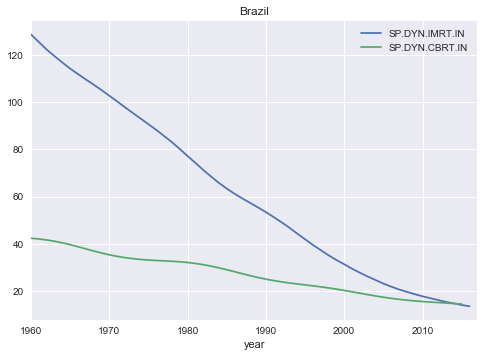

In [69]:
fig, ax = plt.subplots()
df_children_death_rates['SP.DYN.IMRT.IN']['Brazil'].iloc[::-1].plot(ax=ax)
df_birth_rates['SP.DYN.CBRT.IN']['Brazil'].iloc[::-1].plot(ax=ax)
ax.set_title('Brazil')
ax.legend()

# Bengladesh

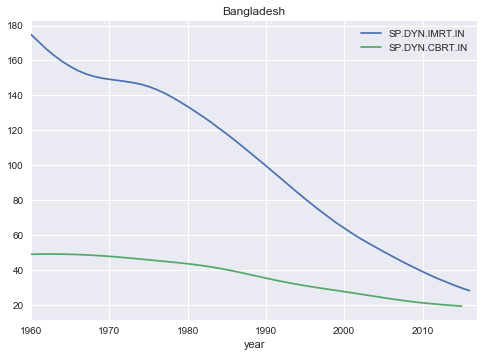

In [70]:
fig, ax = plt.subplots()
df_children_death_rates['SP.DYN.IMRT.IN']['Bangladesh'].iloc[::-1].plot(ax=ax)
df_birth_rates['SP.DYN.CBRT.IN']['Bangladesh'].iloc[::-1].plot(ax=ax)
ax.set_title('Bangladesh')
ax.legend()

# Switching the perspective

Let's now draw this as a sort of trajectory.

In [71]:
x = df_children_death_rates['SP.DYN.IMRT.IN']['Brazil'].iloc[::-1].values
y = df_birth_rates['SP.DYN.CBRT.IN']['Brazil'].iloc[::-1].values
ind = df_birth_rates['SP.DYN.CBRT.IN']['Brazil'].iloc[::-1].index.values

In [72]:
from matplotlib.colors import Normalize
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

Text(0,0.5,'birth rate (per 1000)')

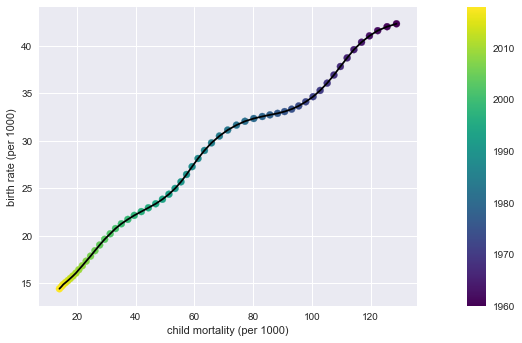

In [85]:
fig, ax = plt.subplots()
ax.plot(x, y, color='k')
ax.scatter(x, y, c=ind, cmap='viridis')
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size="5%", pad=0.7)
fig.add_axes(cax)
norm = Normalize(vmin=1960, vmax=2018)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap='viridis',
                                norm=norm,
                                orientation='vertical')

ax.set_xlabel('child mortality (per 1000)')
ax.set_ylabel('birth rate (per 1000)')

Let's now do this with another country:

In [78]:
def plot_trajectory(country, ax, scatter=True, line=True):
    "Plots a xy trajectory of a country."
    x = df_children_death_rates['SP.DYN.IMRT.IN'][country].iloc[::-1].values
    y = df_birth_rates['SP.DYN.CBRT.IN'][country].iloc[::-1].values
    ind = df_birth_rates['SP.DYN.CBRT.IN'][country].iloc[::-1].index.values
    if line:
        ax.plot(x, y, color='k', label=country, alpha=0.2)
    if scatter:
        ax.scatter(x, y, c=ind, cmap='viridis', alpha=0.5)

Text(0,0.5,'birth rate (per 1000)')

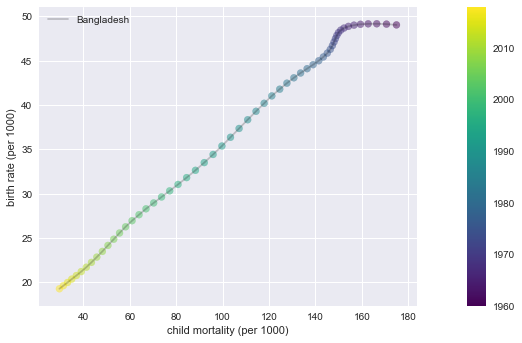

In [86]:
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size="5%", pad=0.7)
fig.add_axes(cax)
norm = Normalize(vmin=1960, vmax=2018)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap='viridis',
                                norm=norm,
                                orientation='vertical')
plot_trajectory('Bangladesh', ax)
ax.legend()
ax.set_xlabel('child mortality (per 1000)')
ax.set_ylabel('birth rate (per 1000)')

What about doing this for several countries?

In [80]:
df_birth_rates.index.get_level_values(0).unique()

Index(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       ...
       'Virgin Islands (U.S.)', 'Vietnam', 'Vanuatu', 'World', 'Samoa',
       'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=264)

Text(0,0.5,'birth rate (per 1000)')

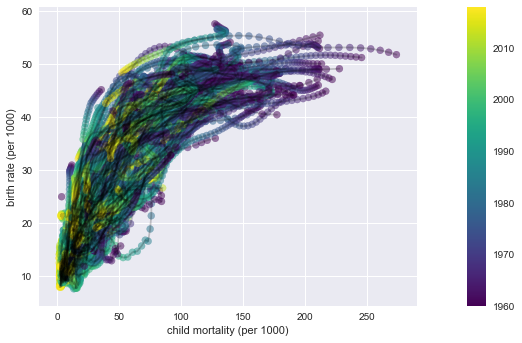

In [87]:
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size="5%", pad=0.7)
fig.add_axes(cax)
norm = Normalize(vmin=1960, vmax=2018)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap='viridis',
                                norm=norm,
                                orientation='vertical')

for country in df_birth_rates.index.get_level_values(0).unique():
    plot_trajectory(country, ax)
ax.set_xlabel('child mortality (per 1000)')
ax.set_ylabel('birth rate (per 1000)')

We can also just draw the lines.

Text(0,0.5,'birth rate (per 1000)')

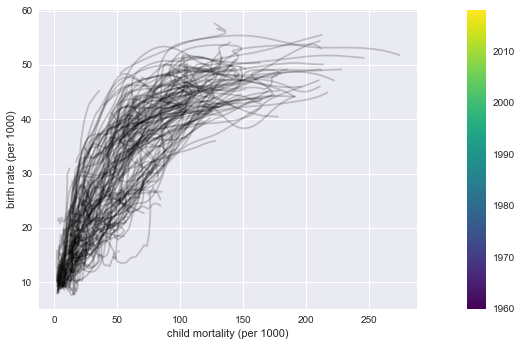

In [88]:
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size="5%", pad=0.7)
fig.add_axes(cax)
norm = Normalize(vmin=1960, vmax=2018)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap='viridis',
                                norm=norm,
                                orientation='vertical')

for country in df_birth_rates.index.get_level_values(0).unique():
    plot_trajectory(country, ax, scatter=False)
ax.set_xlabel('child mortality (per 1000)')
ax.set_ylabel('birth rate (per 1000)')

Interesting. Let's try to do an animation.

# Animating the plot

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

x = np.linspace(-2, 2, 200)

duration = 2

fig, ax = plt.subplots()
def make_frame(t):
    ax.clear()
    ax.plot(x, np.sinc(x**2) + np.sin(x + 2*np.pi/duration * t), lw=3)
    ax.set_ylim(-1.5, 2.5)
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
plt.close(fig)
animation.ipython_display(fps=20, loop=True, autoplay=True)

 98%|█████████▊| 40/41 [00:03<00:00, 11.48it/s]


In [ ]:
fig, ax = plt.subplots()
def make_frame(t):
    year = np.interp(t, [0, duration], [1960, 2018])
    ax.clear()
    x_data = 
    y_data = 
    ax.plot(x_data, y_data)
    return mplfig_to_npimage(fig)



In [93]:
df_children_death_rates['SP.DYN.IMRT.IN'][country].at[1960].values

ValueError: At based indexing on an non-integer index can only have non-integer indexers

In [101]:
df_children_death_rates['SP.DYN.IMRT.IN'].loc['1960']

KeyError: 'the label [1960] is not in the [index]'